**Microbial Fuel Cell Electricity Prediction**

---




1.Data Set Preparation

---



In [ ]:
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
dataset = pd.read_csv('/content/updated_dataset_with_current_also.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -2:].values

# Normalize the input variables
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Reshape the input data for LSTM
X_reshaped = X_normalized.reshape((X_normalized.shape[0], X_normalized.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the LSTM model
# model = models.Sequential()
# model.add(layers.LSTM(32, input_shape=(X_train.shape[1], 1)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(2))  # Output layer with 2 neurons for voltage and current

model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2))  # Output layer with 2 neurons for voltage and current



# Compile the model
initial_learning_rate = 0.001
model.compile(optimizer=AdamW(learning_rate=initial_learning_rate), loss='mae')
# model.compile(loss='mae', optimizer='AdamW')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training loop
epochs = 1000
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss}')

# Generate predictions
predictions = model.predict(X_test)

# Print sample predictions
for i in range(5):
    print(f'Predicted voltage: {predictions[i][0]}, Predicted current: {predictions[i][1]}')


Epoch 1/1000
23/23 [==============================] - 4s 29ms/step - loss: 27.7472 - val_loss: 28.2304
Epoch 2/1000
23/23 [==============================] - 0s 6ms/step - loss: 26.2378 - val_loss: 24.5487
Epoch 3/1000
23/23 [==============================] - 0s 6ms/step - loss: 19.8916 - val_loss: 16.4214
Epoch 4/1000
23/23 [==============================] - 0s 6ms/step - loss: 15.1047 - val_loss: 12.5219
Epoch 5/1000
23/23 [==============================] - 0s 7ms/step - loss: 13.5862 - val_loss: 11.1667
Epoch 6/1000
23/23 [==============================] - 0s 8ms/step - loss: 12.1558 - val_loss: 10.7208
Epoch 7/1000
23/23 [==============================] - 0s 8ms/step - loss: 11.8183 - val_loss: 10.5841
Epoch 8/1000
23/23 [==============================] - 0s 7ms/step - loss: 11.4771 - val_loss: 10.1096
Epoch 9/1000
23/23 [==============================] - 0s 9ms/step - loss: 11.2323 - val_loss: 9.9220
Epoch 10/1000
23/23 [==============================] - 0s 8ms/step - loss: 10.8681

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
predictions = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

mse = mean_squared_error(y_test, predictions)
print(f'MsE: {mse}')

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print(f'R2 Score: {r2}')

6/6 [==============================] - 0s 3ms/step
MAE: 3.3163072937915703
MsE: 47.880051232131024
R2 Score: 0.7064614081305906


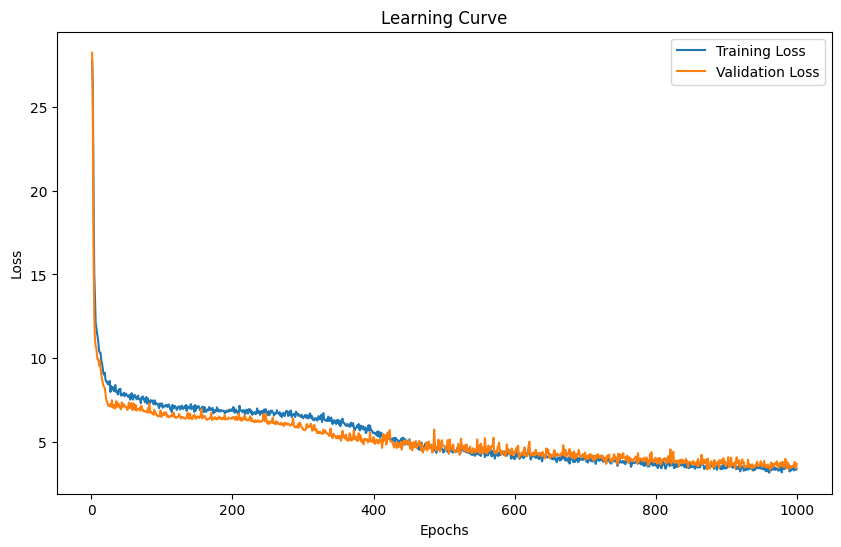

In [ ]:
import matplotlib.pyplot as plt
# history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Load the dataset
dataset = pd.read_csv('/content/updated_dataset_with_current_also.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -2:].values

# Normalize the input variables
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the XGBoost Regressor model with 1000 epochs (n_estimators)
model = xgb.XGBRegressor(n_estimators=1000)

# Training
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Print sample predictions
for i in range(5):
    print(f'Predicted voltage: {predictions[i][0]}, Predicted current: {predictions[i][1]}')


Mean Absolute Error (MAE): 0.5564082342159157
Predicted voltage: 6.103211879730225, Predicted current: 18.489423751831055
Predicted voltage: 15.96217155456543, Predicted current: 48.3486328125
Predicted voltage: 19.24010467529297, Predicted current: 58.3455810546875
Predicted voltage: 10.002595901489258, Predicted current: 30.300724029541016
Predicted voltage: 15.458161354064941, Predicted current: 47.60392761230469


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
dataset = pd.read_csv('/content/updated_dataset_with_current_also.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -2:].values

# Normalize the input variables
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Reshape the input data for LSTM
X_reshaped = X_normalized.reshape((X_normalized.shape[0], X_normalized.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the primitive LSTM model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2))  # Output layer with 2 neurons for voltage and current

# Compile the model
initial_learning_rate = 0.001
model.compile(optimizer=AdamW(learning_rate=initial_learning_rate), loss='mae')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training loop
epochs = 1000
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss}')

# Generate predictions
predictions = model.predict(X_test)

# Print sample predictions
for i in range(5):
    print(f'Predicted voltage: {predictions[i][0]}, Predicted current: {predictions[i][1]}')


Epoch 1/1000
23/23 [==============================] - 3s 20ms/step - loss: 27.7547 - val_loss: 28.2468
Epoch 2/1000
23/23 [==============================] - 0s 7ms/step - loss: 25.9562 - val_loss: 23.0489
Epoch 3/1000
23/23 [==============================] - 0s 8ms/step - loss: 17.5847 - val_loss: 13.8655
Epoch 4/1000
23/23 [==============================] - 0s 7ms/step - loss: 13.1131 - val_loss: 11.3643
Epoch 5/1000
23/23 [==============================] - 0s 8ms/step - loss: 12.2253 - val_loss: 10.4393
Epoch 6/1000
23/23 [==============================] - 0s 7ms/step - loss: 11.2844 - val_loss: 9.8892
Epoch 7/1000
23/23 [==============================] - 0s 7ms/step - loss: 10.7550 - val_loss: 10.0454
Epoch 8/1000
23/23 [==============================] - 0s 13ms/step - loss: 10.3847 - val_loss: 9.2893
Epoch 9/1000
23/23 [==============================] - 0s 14ms/step - loss: 9.9651 - val_loss: 9.1533
Epoch 10/1000
23/23 [==============================] - 0s 12ms/step - loss: 10.1245

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
dataset = pd.read_csv('/content/updated_dataset_with_current_also.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -2:].values

# Normalize the input variables
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor with 'huber' loss
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='huber')

# Training loop
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Print sample predictions
for i in range(5):
    print(f'Predicted voltage: {predictions[i][0]}, Predicted current: {predictions[i][1]}')


ValueError: ignored

1/1 [==============================] - 0s 24ms/step


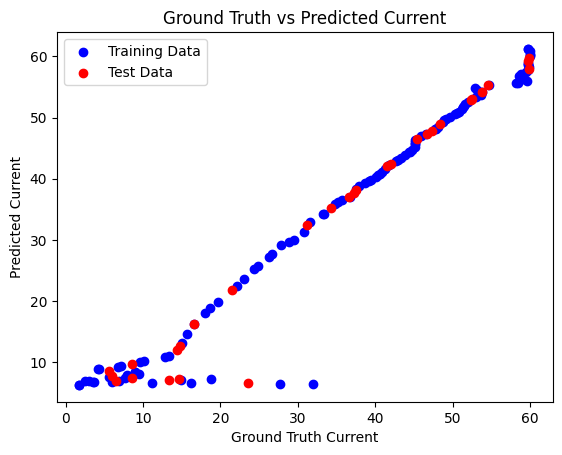

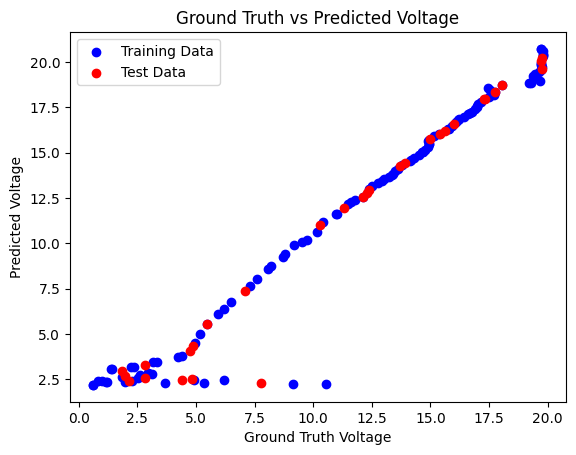

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot ground truth vs predicted values for current
plt.scatter(y_train[:, 1], y_train_pred[:, 1], color='blue', label='Training Data')
plt.scatter(y_test[:, 1], y_test_pred[:, 1], color='red', label='Test Data')
plt.xlabel('Ground Truth Current')
plt.ylabel('Predicted Current')
plt.title('Ground Truth vs Predicted Current')
plt.legend()
plt.show()

# Plot ground truth vs predicted values for voltage
plt.scatter(y_train[:, 0], y_train_pred[:, 0], color='blue', label='Training Data')
plt.scatter(y_test[:, 0], y_test_pred[:, 0], color='red', label='Test Data')
plt.xlabel('Ground Truth Voltage')
plt.ylabel('Predicted Voltage')
plt.title('Ground Truth vs Predicted Voltage')
plt.legend()
plt.show()

1/1 [==============================] - 0s 232ms/step


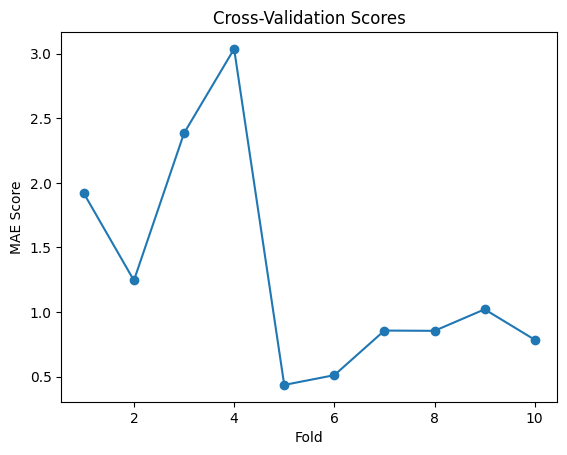

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

# Create a wrapper class for the Keras model to make it compatible with cross_val_score
class KerasRegressorWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
        self.model.fit(X_reshaped, y)

    def predict(self, X):
        X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))
        return self.model.predict(X_reshaped)

# Create a pipeline with the scaler and the Keras model
pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', KerasRegressorWrapper(model))
])

# Compute cross-validation scores
cv_scores = cross_val_score(pipeline, X_normalized, y, cv=10, scoring='neg_mean_absolute_error')

# Convert scores to positive values
cv_scores = np.abs(cv_scores)

# Plot the cross-validation scores
plt.plot(np.arange(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Cross-Validation Scores')
plt.show()


In [ ]:

print(cv_scores.mean())

1.3045032259141371


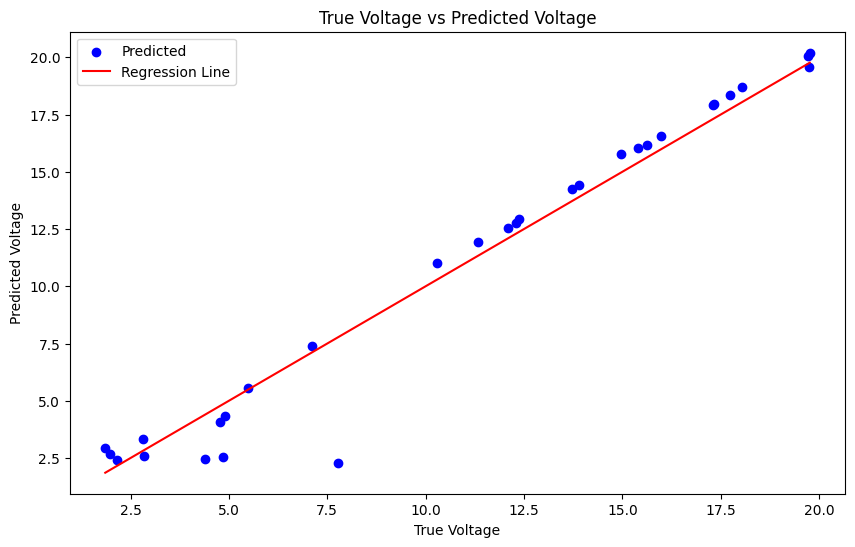

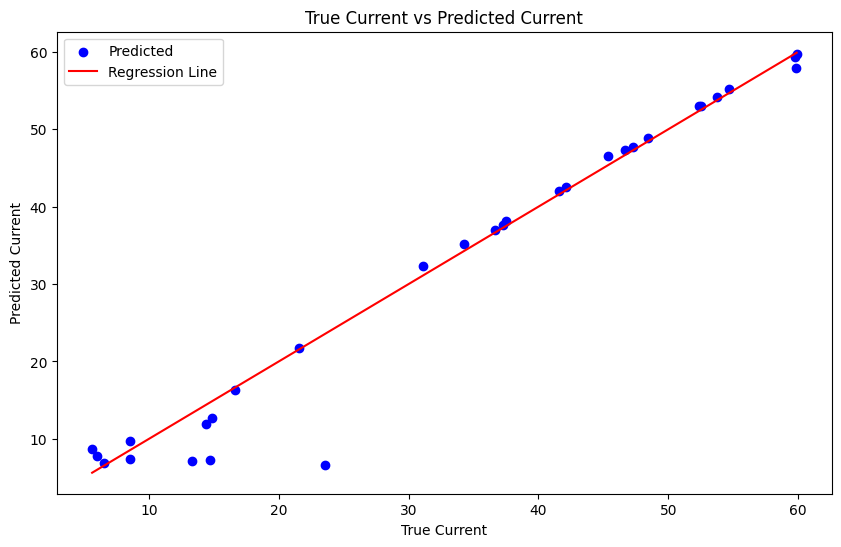

In [ ]:
# Plot true voltage vs predicted voltage
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:, 0], predictions[:, 0], color='b', label='Predicted')
plt.plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], color='r', label='Regression Line')
plt.xlabel('True Voltage')
plt.ylabel('Predicted Voltage')
plt.title('True Voltage vs Predicted Voltage')
plt.legend()
plt.show()

# Plot true current vs predicted current
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:, 1], predictions[:, 1], color='b', label='Predicted')
plt.plot([min(y_test[:, 1]), max(y_test[:, 1])], [min(y_test[:, 1]), max(y_test[:, 1])], color='r', label='Regression Line')
plt.xlabel('True Current')
plt.ylabel('Predicted Current')
plt.title('True Current vs Predicted Current')
plt.legend()
plt.show()


In [ ]:
# predictions = model.predict(X_test)

# predicted_voltage = []  # List to store predicted voltage values
# predicted_current = []  # List to store predicted current values
# time = dataset.iloc[X_train.shape[0]:, 0].values

# # Store the predicted voltage and current values in separate lists
# for i in range(30):
#     predicted_voltage.append(predictions[i][0])
#     predicted_current.append(predictions[i][1])

# # Plot the predicted voltage against time
# plt.figure(figsize=(10, 6))
# plt.plot(time[:30], predicted_voltage, 'b-', label='Predicted Voltage')
# plt.xlabel('Time')
# plt.ylabel('Predicted Voltage')
# plt.title('Predicted Voltage over Time')
# plt.legend()
# plt.show()

# # Plot the predicted current against time
# plt.figure(figsize=(10, 6))
# plt.plot(time[:30], predicted_current, 'r-', label='Predicted Current')
# plt.xlabel('Time')
# plt.ylabel('Predicted Current')
# plt.title('Predicted Current over Time')
# plt.legend()
# plt.show()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 32)             128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
dataset.iloc[0]

Time - (hours)          1.38200
pH                      6.70000
COD                 19595.83000
TSS                    34.90708
Electricity (mV)        0.59300
Current (mA)            1.79697
Name: 0, dtype: float64

In [ ]:
X = dataset.iloc[:, 0:4].head
y = dataset.iloc[:, -2:].head
print(y)

<bound method NDFrame.head of      Electricity (mV)  Current (mA)
0            0.593000      1.796970
1            0.593000      1.796970
2            0.840000      2.545455
3            1.014317      3.073688
4            1.186000      3.593939
..                ...           ...
141         19.764420     59.892182
142         19.796580     59.989636
143         19.802120     60.006424
144         19.812000     60.036364
145         19.819560     60.059273

[146 rows x 2 columns]>


Epoch 1/1000
23/23 [==============================] - 3s 20ms/step - loss: 27.7308 - val_loss: 28.1795
Epoch 2/1000
23/23 [==============================] - 0s 6ms/step - loss: 25.9866 - val_loss: 23.7698
Epoch 3/1000
23/23 [==============================] - 0s 6ms/step - loss: 19.2406 - val_loss: 16.1162
Epoch 4/1000
23/23 [==============================] - 0s 8ms/step - loss: 15.3638 - val_loss: 13.3399
Epoch 5/1000
23/23 [==============================] - 0s 7ms/step - loss: 13.6035 - val_loss: 11.7064
Epoch 6/1000
23/23 [==============================] - 0s 6ms/step - loss: 12.9340 - val_loss: 10.9955
Epoch 7/1000
23/23 [==============================] - 0s 6ms/step - loss: 12.2972 - val_loss: 10.7518
Epoch 8/1000
23/23 [==============================] - 0s 7ms/step - loss: 11.2435 - val_loss: 10.4283
Epoch 9/1000
23/23 [==============================] - 0s 6ms/step - loss: 10.9821 - val_loss: 10.0505
Epoch 10/1000
23/23 [==============================] - 0s 6ms/step - loss: 10.942

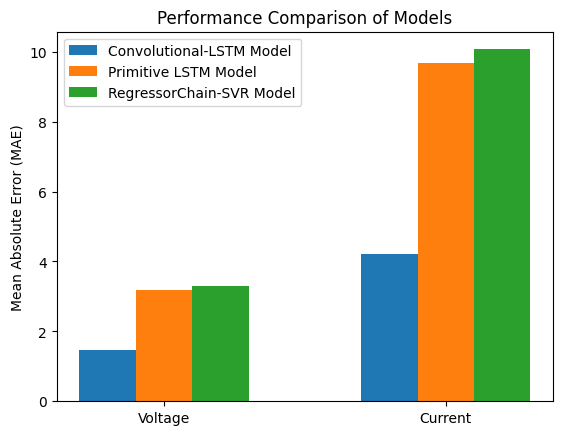

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('/content/updated_dataset_with_current_also.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, -2:].values

# Normalize the input variables
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Reshape the input data for LSTM
X_reshaped = X_normalized.reshape((X_normalized.shape[0], X_normalized.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the existing Convolutional LSTM model
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2))  # Output layer with 2 neurons for voltage and current

# Compile the model
initial_learning_rate = 0.001
model.compile(optimizer=AdamW(learning_rate=initial_learning_rate), loss='mae')

# Training loop
epochs = 1000
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Existing Model Test loss: {loss}')

# Generate predictions for the existing model
existing_predictions = model.predict(X_test)

# Primitive LSTM model
primitive_model = models.Sequential()
primitive_model.add(layers.LSTM(32, input_shape=(X_train.shape[1], 1)))
primitive_model.add(layers.Dense(16, activation='relu'))
primitive_model.add(layers.Dense(2))  # Output layer with 2 neurons for voltage and current

# Compile the primitive model
primitive_model.compile(optimizer=AdamW(learning_rate=initial_learning_rate), loss='mae')

# Training loop for the primitive model
primitive_history = primitive_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

# Generate predictions for the primitive model
primitive_predictions = primitive_model.predict(X_test)

# RegressorChain model with SVR base estimator
svr_voltage = SVR()
svr_current = SVR()
svr_chain = RegressorChain(base_estimator=svr_voltage, order=[0, 1])  # Order specifies the order of target variables

# Training loop for the RegressorChain model
svr_chain.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Generate predictions for the RegressorChain model
svr_chain_predictions = svr_chain.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate Mean Absolute Error (MAE) for all models
existing_mae = np.mean(np.abs(existing_predictions - y_test), axis=0)
primitive_mae = np.mean(np.abs(primitive_predictions - y_test), axis=0)
svr_chain_mae = np.mean(np.abs(svr_chain_predictions - y_test), axis=0)

# Plot the performance graph
labels = ['Voltage', 'Current']
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x - width, existing_mae, width, label='Convolutional-LSTM Model')
ax.bar(x, primitive_mae, width, label='Primitive LSTM Model')
ax.bar(x + width, svr_chain_mae, width, label='RegressorChain-SVR Model')

ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


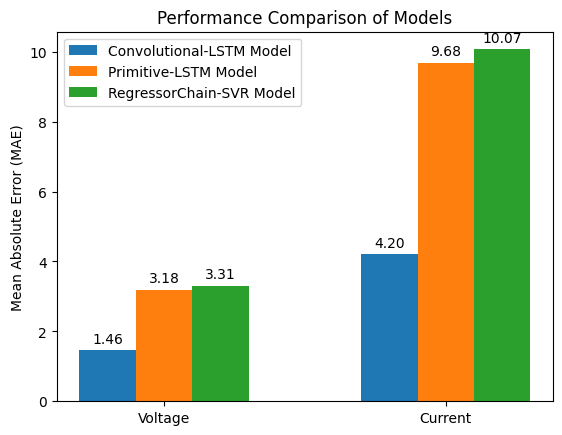

In [3]:
# Calculate Mean Absolute Error (MAE) for all models
existing_mae = np.mean(np.abs(existing_predictions - y_test), axis=0)
primitive_mae = np.mean(np.abs(primitive_predictions - y_test), axis=0)
svr_chain_mae = np.mean(np.abs(svr_chain_predictions - y_test), axis=0)

# Plot the performance graph
labels = ['Voltage', 'Current']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, existing_mae, width, label='Convolutional-LSTM Model')
rects2 = ax.bar(x, primitive_mae, width, label='Primitive-LSTM Model')
rects3 = ax.bar(x + width, svr_chain_mae, width, label='RegressorChain-SVR Model')

ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach the MAE values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach the MAE values above the bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


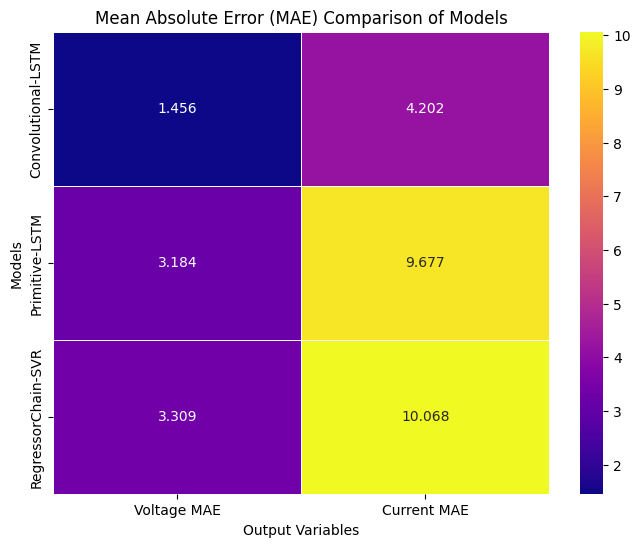

In [8]:
import seaborn as sns
existing_mae = np.mean(np.abs(existing_predictions - y_test), axis=0)
primitive_mae = np.mean(np.abs(primitive_predictions - y_test), axis=0)
svr_chain_mae = np.mean(np.abs(svr_chain_predictions - y_test), axis=0)

# Create a DataFrame for the MAE values of the models
mae_data = {
    'Models': ['Convolutional-LSTM', 'Primitive-LSTM', 'RegressorChain-SVR'],
    'Voltage MAE': [existing_mae[0], primitive_mae[0], svr_chain_mae[0]],
    'Current MAE': [existing_mae[1], primitive_mae[1], svr_chain_mae[1]]
}

mae_df = pd.DataFrame(mae_data)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mae_df.set_index('Models'), annot=True, cmap='plasma', fmt='.3f', linewidths=0.5)
plt.title('Mean Absolute Error (MAE) Comparison of Models')
plt.xlabel('Output Variables')
plt.ylabel('Models')
plt.show()